**Target:**

- Get the basic skeleton right. We will try and avoid changing this skeleton as much as possible.
- No fancy stuff

**Results:**

- Parameters: 85.9k
- Best Training Accuracy: 99.03
- Best Test Accuracy: 99.14

**Analysis:**

- The model is still large, but working. 
- We will decrease parameters in next step

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net2
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net2().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
         MaxPool2d-5           [-1, 64, 12, 12]               0
            Conv2d-6           [-1, 32, 12, 12]           2,048
              ReLU-7           [-1, 32, 12, 12]               0
            Conv2d-8           [-1, 32, 10, 10]           9,216
              ReLU-9           [-1, 32, 10, 10]               0
           Conv2d-10             [-1, 64, 8, 8]          18,432
             ReLU-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 6, 6]          36,864
             ReLU-13             [-1, 64, 6, 6]               0
AdaptiveAvgPool2d-14             [-1, 6

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


100%|██████████| 9912422/9912422 [00:00<00:00, 232790647.35it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115587494.11it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 97735919.46it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3062293.65it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=2.3018 Batch_id=468 Accuracy=11.96: 100%|██████████| 469/469 [00:20<00:00, 23.24it/s]


Test set: Average loss: 2.3015, Accuracy: 980/10000 (9.80%)

Epoch 2


Train: Loss=0.2934 Batch_id=468 Accuracy=47.26: 100%|██████████| 469/469 [00:19<00:00, 23.85it/s]


Test set: Average loss: 0.3829, Accuracy: 8767/10000 (87.67%)

Epoch 3


Train: Loss=0.2074 Batch_id=468 Accuracy=93.25: 100%|██████████| 469/469 [00:18<00:00, 25.13it/s]


Test set: Average loss: 0.1841, Accuracy: 9407/10000 (94.07%)

Epoch 4


Train: Loss=0.1854 Batch_id=468 Accuracy=95.92: 100%|██████████| 469/469 [00:18<00:00, 25.00it/s]


Test set: Average loss: 0.1374, Accuracy: 9580/10000 (95.80%)

Epoch 5


Train: Loss=0.0913 Batch_id=468 Accuracy=97.18: 100%|██████████| 469/469 [00:19<00:00, 24.19it/s]


Test set: Average loss: 0.0588, Accuracy: 9815/10000 (98.15%)

Epoch 6


Train: Loss=0.0195 Batch_id=468 Accuracy=97.63: 100%|██████████| 469/469 [00:19<00:00, 24.29it/s]


Test set: Average loss: 0.0560, Accuracy: 9821/10000 (98.21%)

Epoch 7


Train: Loss=0.0497 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:18<00:00, 25.27it/s]


Test set: Average loss: 0.1003, Accuracy: 9702/10000 (97.02%)

Epoch 8


Train: Loss=0.0974 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:18<00:00, 25.25it/s]


Test set: Average loss: 0.0493, Accuracy: 9845/10000 (98.45%)

Epoch 9


Train: Loss=0.1633 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:18<00:00, 24.90it/s]


Test set: Average loss: 0.0478, Accuracy: 9850/10000 (98.50%)

Epoch 10


Train: Loss=0.0340 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:18<00:00, 25.27it/s]


Test set: Average loss: 0.0443, Accuracy: 9869/10000 (98.69%)

Epoch 11


Train: Loss=0.1174 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:18<00:00, 25.87it/s]


Test set: Average loss: 0.0351, Accuracy: 9895/10000 (98.95%)

Epoch 12


Train: Loss=0.0149 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:19<00:00, 24.33it/s]


Test set: Average loss: 0.0381, Accuracy: 9886/10000 (98.86%)

Epoch 13


Train: Loss=0.0407 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:19<00:00, 24.45it/s]


Test set: Average loss: 0.0343, Accuracy: 9895/10000 (98.95%)

Epoch 14


Train: Loss=0.0975 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:18<00:00, 25.94it/s]


Test set: Average loss: 0.0360, Accuracy: 9884/10000 (98.84%)

Epoch 15


Train: Loss=0.1137 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:18<00:00, 25.53it/s]


Test set: Average loss: 0.0315, Accuracy: 9914/10000 (99.14%)



Text(0.5, 1.0, 'Test Accuracy')

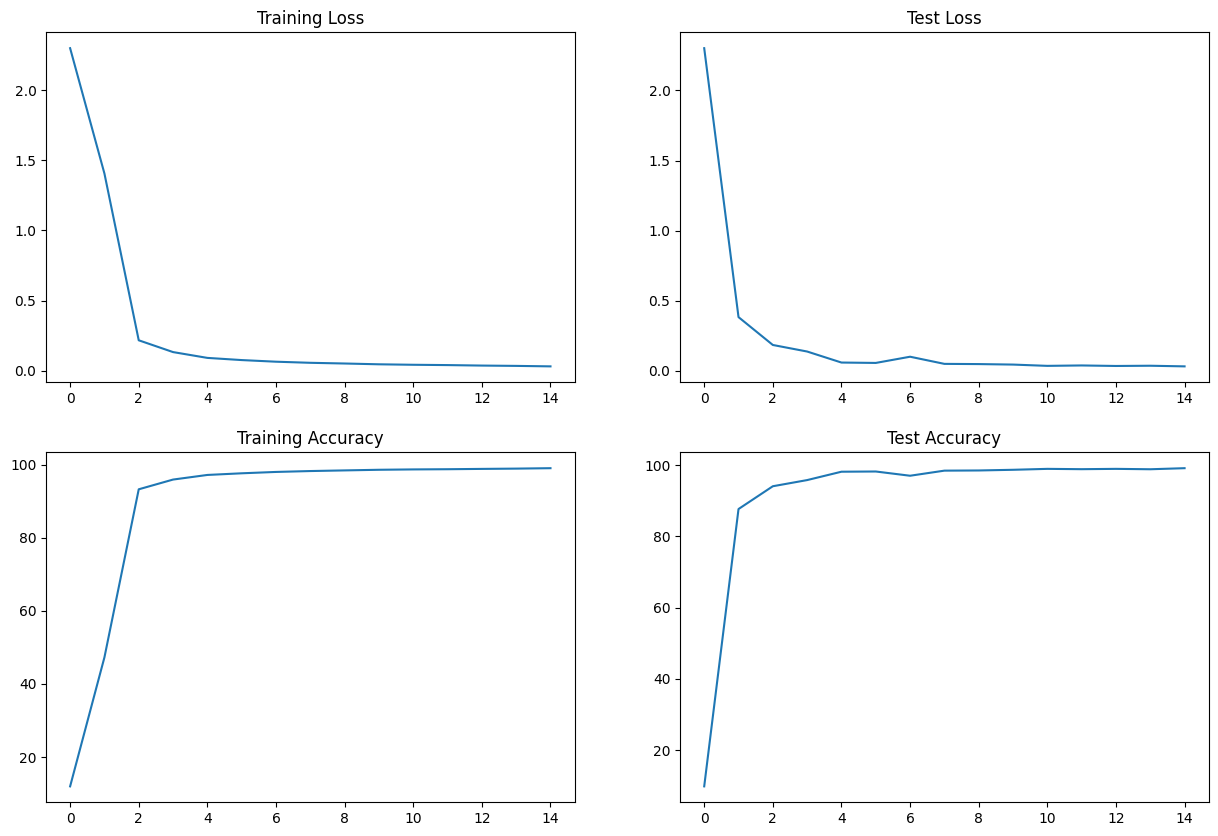

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.02833333333334
best test accuracy :  99.14


In [8]:
print("best train loss : ", min(train_losses))
print("best test loss : ", min(test_losses))

best train loss :  0.030942018295743508
best test loss :  0.03150376193076372
